In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# %matplotlib widget
import seaborn as sns
sns.set_context("notebook")
# colors = sns.color_palette("colorblind",9)
# colors = sns.color_palette("cubehelix",9)
colors = sns.color_palette("husl",10)

import h5py

font = {'size'   : 16}
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"


# colors = np.asarray([(235, 172, 35), (184, 0, 88), (0, 140, 249), (0, 110, 0), (0, 187, 173), (209, 99, 230), (178, 69, 2), (255, 146, 135), (89, 84, 214), (0, 198, 248), (135, 133, 0), (0, 167, 108), (189, 189, 189)]) / 255
# colors = np.asarray([(152, 68, 100), (94, 204, 171), (86, 100, 26), (192, 175, 251), (230, 161, 118), (0, 103, 138),(205, 205, 205)]) / 255 
# colors = ['xkcd:royal blue', 'xkcd:brown red', 'xkcd:yellow ochre', 'xkcd:wisteria', 'xkcd:tiffany blue', 'xkcd:gunmetal','xkcd:light red']

In [48]:
# import h5 data named nlpse_data.h5

with h5py.File('nlpse_data/nlpse_data.h5', 'r') as hf:
    # get all variables from data file 
    Rnlpse = hf['R'][:]
    y = hf['y'][:]
    u = hf['u'][:]
    v = hf['v'][:]
    w = hf['w'][:]
    p = hf['p'][:]
    U = hf['U'][:]
    Uy = hf['Uy'][:]
    V = hf['V'][:]
    x = hf['x'][:]
    xx = hf['xx'][:]
    yy = hf['yy'][:]

    alpha_10 = hf['alpha/alpha_10'][:]
    # alpha_20 = hf['alpha/alpha_20'][:]

nx = Rnlpse.size
ny = y.size
nu = 3.75e-06
l0 = 0.000170672
    # alpha_11 = hf['alpha/alpha_11'][:]

print(f"Num stations collected so far = {Rnlpse.size}\n")
print(f"Number of grid points used in the wall normal direction = {u.shape[-1]}\n")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'nlpse_data/nlpse_data.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Text(0.5, 0.98, 'Station = 0, x/c = 930.48')

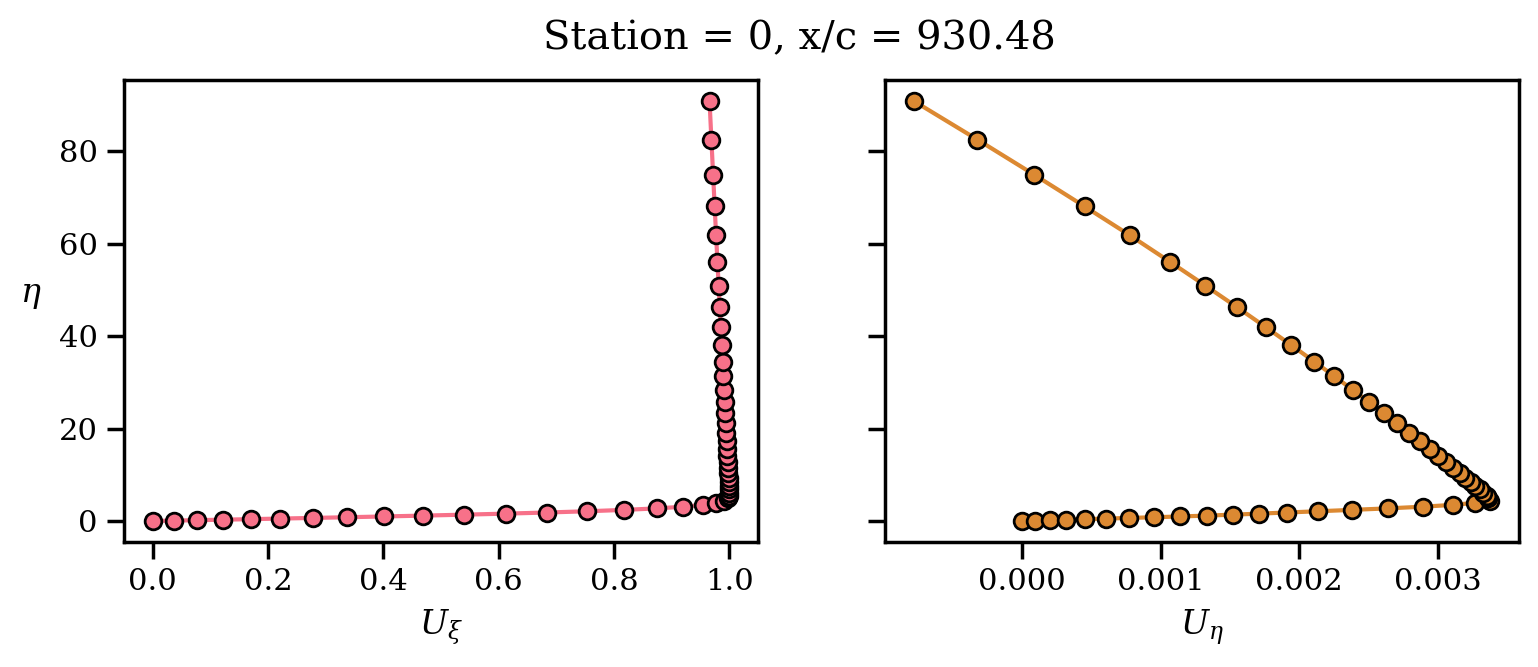

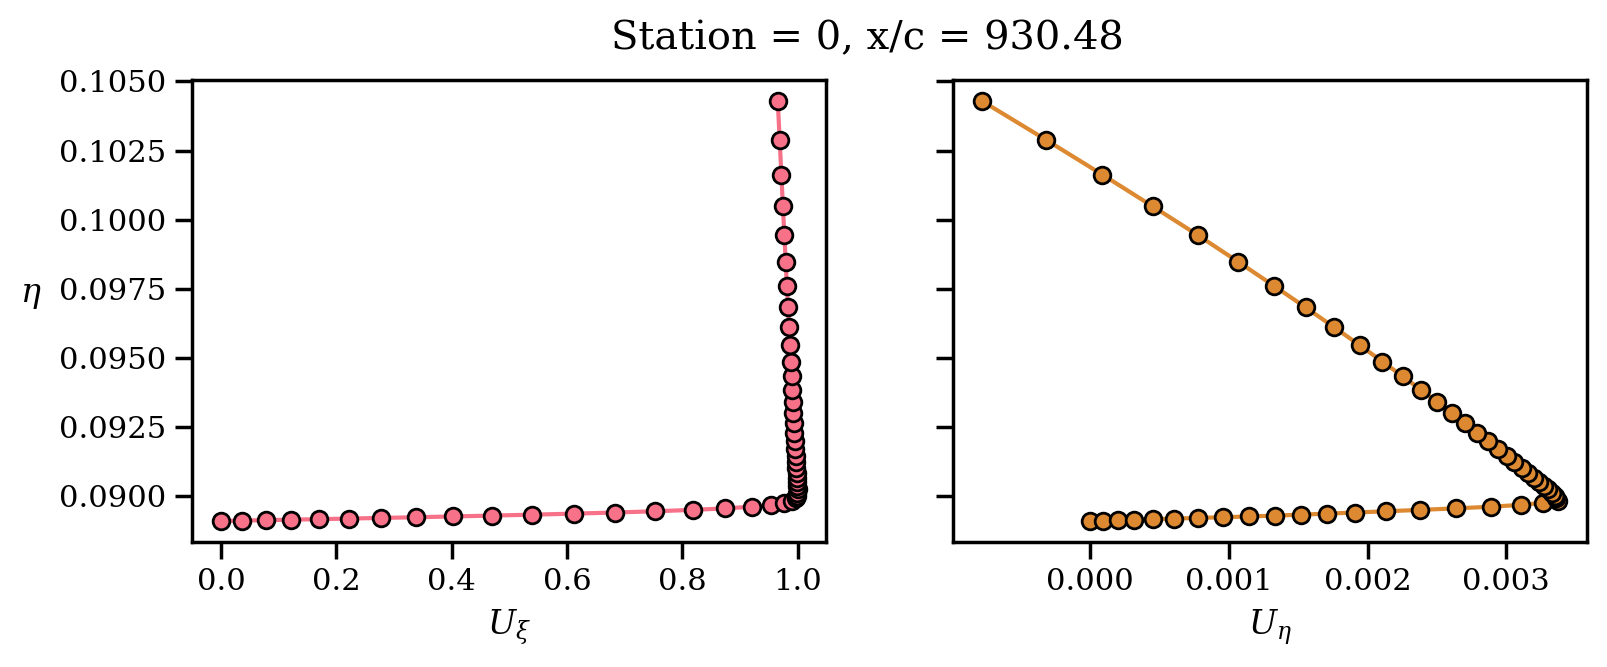

In [46]:
# let's plot velocity profiles

# curent status:
# the pse solver runs but if i exam velocity profiles at downstream stations, they are not smooth 
# and the magnitudes are insanely high. 

# two things to try:
# 1. runs a LPSE where i don't don't advance the baseflow, just use the RANS one 
# 2. figure out what the heck is going on with the velocity profiles.

station = 0
skipval = 1
max_idx = ny
# max_idx = ny-10
fig, axs = plt.subplots(1,2, figsize=(9,3), dpi = 200, sharey=True)
axs[0].plot(U[0:max_idx,station], y[0:max_idx],'-o',markeredgecolor='k',color=colors[0])
axs[0].set_xlabel(r'$U_{\xi}$')
# axs[0].set_ylim([0,100])

axs[1].plot(V[::skipval,station], y[0:max_idx],'-o',markeredgecolor='k',color=colors[1])
axs[1].set_xlabel(r'$U_{\eta}$')

axs[0].set_ylabel(r'$\eta$', rotation=0, labelpad=10)
plt.suptitle(f'Station = {station}, x/c = {xx[station]/l0:.2f}')

fig, axs = plt.subplots(1,2, figsize=(9,3), dpi = 200, sharey=True)
axs[0].plot(U[0:max_idx,station], yy[0:max_idx],'-o',markeredgecolor='k',color=colors[0])
axs[0].set_xlabel(r'$U_{\xi}$')
# axs[0].set_ylim([0,100])

axs[1].plot(V[::skipval,station], yy[0:max_idx],'-o',markeredgecolor='k',color=colors[1])
axs[1].set_xlabel(r'$U_{\eta}$')

axs[0].set_ylabel(r'$\eta$', rotation=0, labelpad=10)
plt.suptitle(f'Station = {station}, x/c = {xx[station]/l0:.2f}')

alpha init = (0.19205731795323147+0.00017466754945981872j)


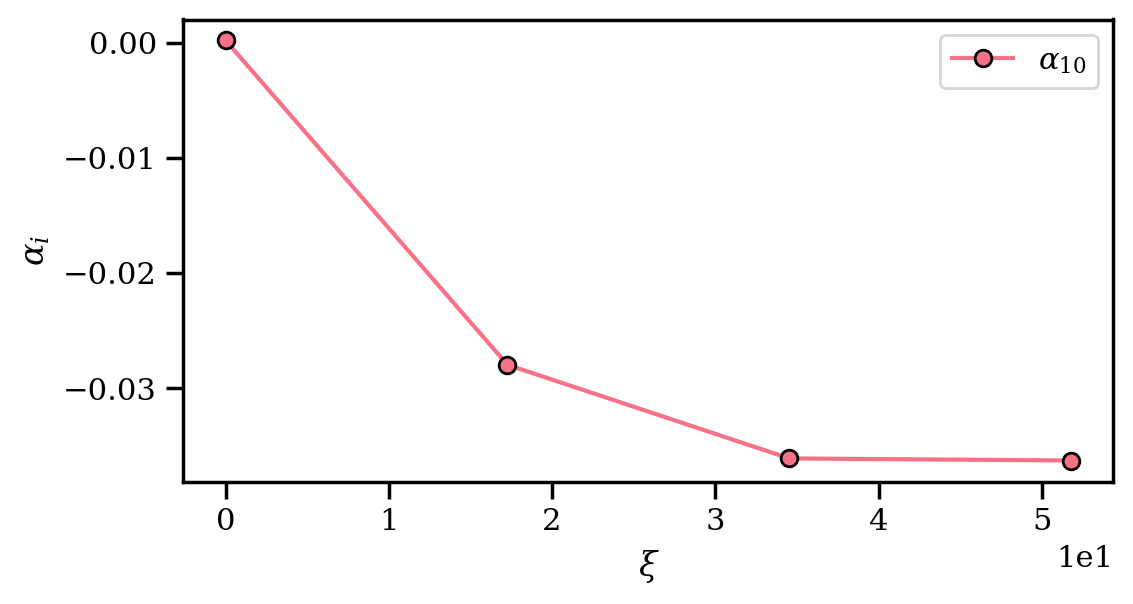

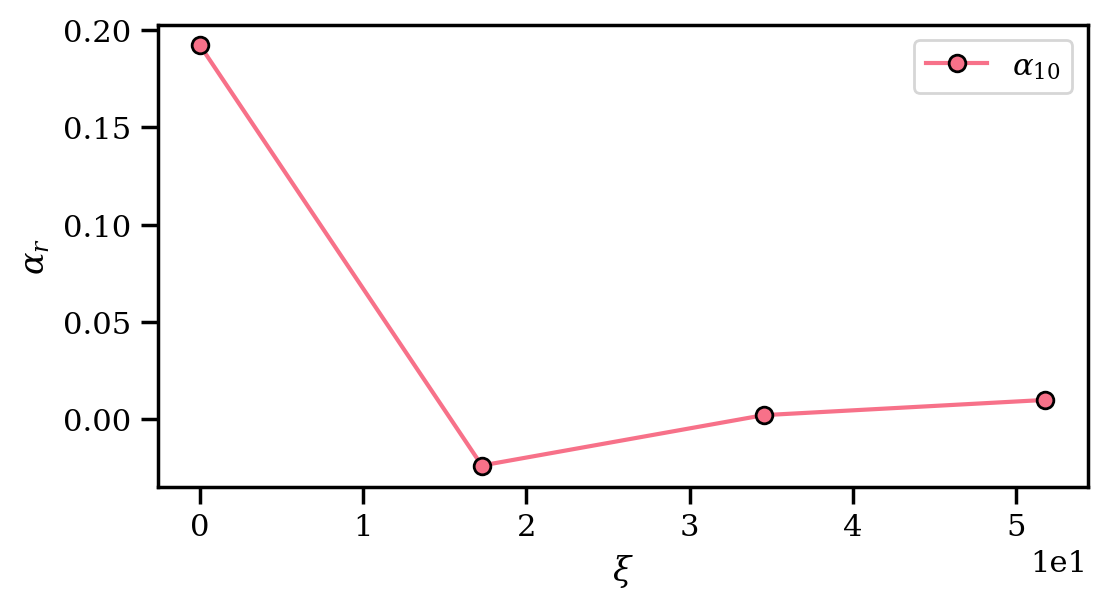

In [37]:

plt.figure(figsize=(6,3),dpi=200)
plt.plot(x, alpha_10.imag, '-o', markeredgecolor='k', color=colors[0], label=r'$\alpha_{10}$')
# plt.plot(x, alpha_20.imag, '-o', markeredgecolor='k', color=colors[1], label=r'$\alpha_{20}$')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\alpha_i$')
plt.legend()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

plt.figure(figsize=(6,3),dpi=200)
plt.plot(x, alpha_10.real, '-o', markeredgecolor='k', color=colors[0], label=r'$\alpha_{10}$')
# plt.plot(x, alpha_20.real, '-o', markeredgecolor='k', color=colors[1], label=r'$\alpha_{20}$')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\alpha_r$')
plt.legend()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))

print(f"alpha init = {alpha_10[0]}")

(2, 1, 4, 50)


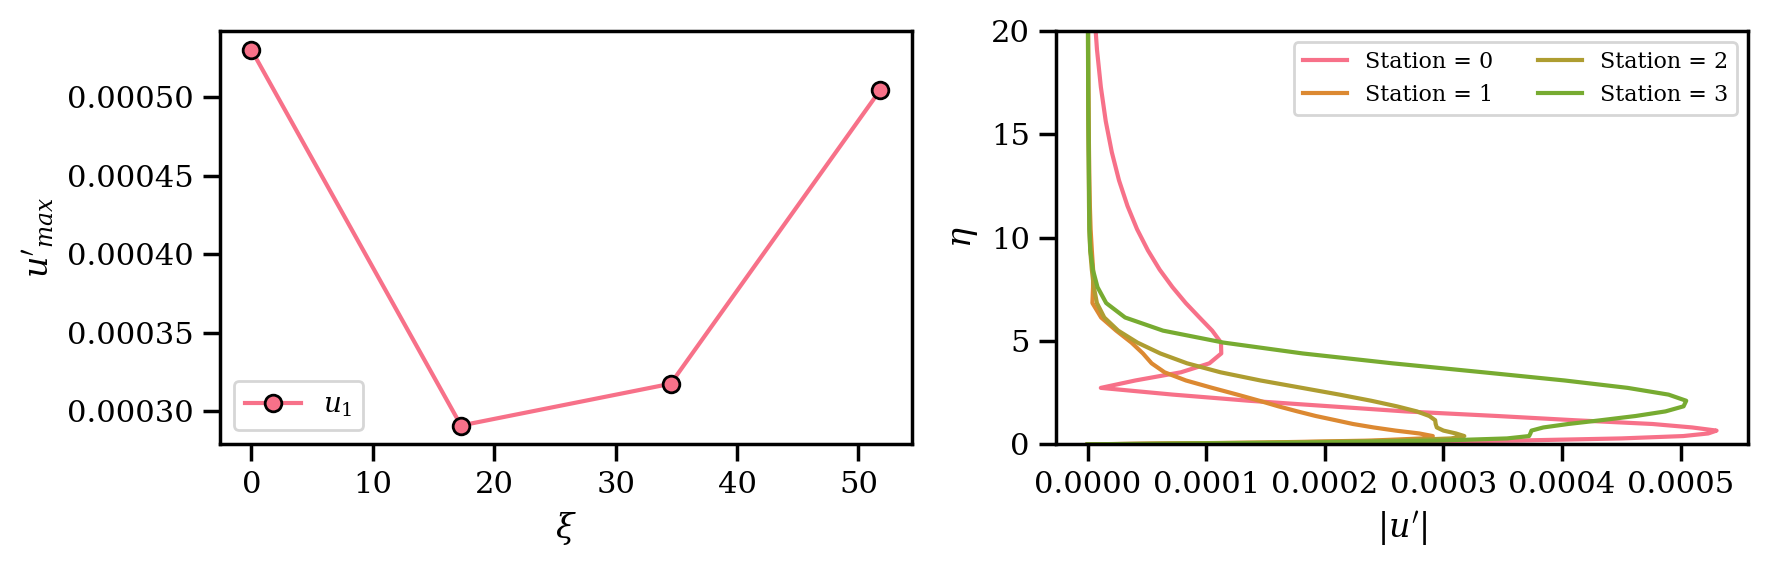

In [38]:
print(u.shape)

u_max = np.max(np.abs(u), axis=3)
abs_u = np.abs(u)
fig, axs = plt.subplots(1,2, figsize=(9,3), dpi = 200)
axs[0].plot(x, u_max[1,0, :],'o-', markeredgecolor='k', color=colors[0], label=r'$u_{1}$')

axs[0].set_xlabel(r'$\xi$')
axs[0].set_ylabel(r"$u'_{max}$")
axs[0].legend(fontsize=10)

# station_plot = [0, 20, 40, 60, 80, 100, 120, 140, 160]
station_plot = np.arange(0,5,1)
count = 0 
for station in station_plot:
    try:
        axs[1].plot(abs_u[1,0,station,:], y, '-', color = colors[count], markeredgecolor='k', label=f"Station = {station}")
    except:
        pass
    count += 1
axs[1].set_xlabel(r"$|u'|$")
axs[1].set_ylabel(r"$\eta$")
axs[1].set_ylim([0,20])
axs[1].legend(fontsize=8, ncols=2)


plt.tight_layout()

# calculate the N factor
# find index of max u' 
idx = np.argmax(u_max[1,0,:])

N factor = 0.0
x.shape = (4,)
xx.shape = (4,)


Text(0, 0.5, '$N$')

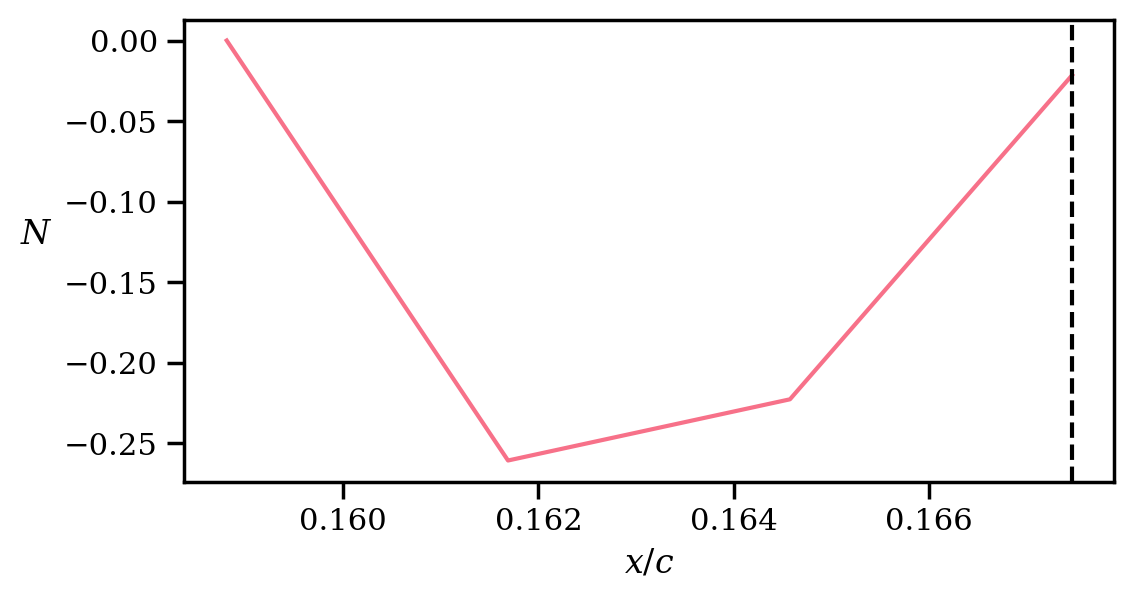

In [39]:
nfactor = np.log10(u_max[1,0,idx] / u_max[1,0,0])
print(f"N factor = {nfactor}")

print(f"x.shape = {x.shape}")
print(f"xx.shape = {xx.shape}")

nfactor = np.log10(u_max[1,0,:] / u_max[1,0,0])
plt.figure(figsize=(6,3),dpi=200)
plt.plot(xx, nfactor,'-', markeredgecolor='k', color=colors[0])

# find where N factor = 9.5 and plot a vertical line 
try:
    idx = np.where(nfactor > 9.5)[0][0]
except:
    idx = -1
plt.axvline(xx[idx], color='k', linestyle='--')

plt.xlabel(r'$x/c$')
plt.ylabel(r'$N$', rotation=0, labelpad=10)

In [40]:
# From PSE reference 
f = 1840 # Hz 
# omega = 2 * np.pi * f * Re_delta_star * nu / U_inf**2
# omega = 2 * np.pi * f * Re * nu / U_inf**2
omega_dim = 2 * np.pi * f 
print(f"Omega = {omega}")

# omega = F * Re / 1e6 
F = omega * 1e6 / Re

print(f"F = {F}")

alpha = 0.1242 - (1.0j * 2.7250 * 10**-4)
alpha_dim = alpha / delta_

print(f"alpha = {alpha}")
print(f"alpha_dim = {alpha_dim}")

NameError: name 'omega' is not defined

In [ ]:
# let's go back from F to omega 

F = 4000
omega = F * Re / 1e6
print(f"Omega = {omega}")
f = omega * U_inf**2 / (2 * np.pi * nu)
print(f"f = {f/1e6} MHz")

In [ ]:
alphas = np.load('./alphas.npy')
modes = np.load('./modes.npy')

ny = y.size 
I = np.eye(ny)
zero = np.zeros((ny,ny))
helper_mats1 = np.block([ [np.eye(4*ny), np.zeros((4*ny, 4*ny))]])
helper_matsU = np.block([[I, zero, zero, zero]])
helper_matsV = np.block([[zero, I, zero, zero]])
helper_matsW = np.block([[zero, zero, I, zero]])
helper_matsP = np.block([[zero, zero, zero, I]])

print(helper_matsU.shape)
print(helper_mats1.shape)
print(modes.shape)
# uhat = helper_matsU @ helper_mats1 @ modes 
uhat = helper_matsU @ modes

# find index closest to alpha_r = 10 and alpha_i = 0.1
alpha_r_loc = 550
alpha_i_loc = 10
idx = np.argmin(np.abs(alphas - alpha_r_loc - alpha_i_loc*1.0j))

print(f"Index closest to alpha_r = {alpha_r_loc} and alpha_i = {alpha_i_loc} is {idx}\n")
print(f"alpha_r = {alphas[idx].real}, alpha_i = {alphas[idx].imag}\n")

fig, axs = plt.subplots(1,2, figsize=(9,3), dpi = 200)
axs[0].plot(np.real(alphas), np.imag(alphas), 'o', markeredgecolor='k', color=colors[0])
axs[0].plot(np.real(alphas[idx]), np.imag(alphas[idx]), '.', markeredgecolor='k', color=colors[6])
axs[0].set_xlabel(r'$\alpha_r$')
axs[0].set_ylabel(r'$\alpha_i$', rotation=0, labelpad=10)
axs[0].set_xlim(500,600)
axs[0].set_ylim(-10,20)
axs[0].set_title('NLF Spectrum')

axs[1].plot(np.abs(uhat[:,idx]), y, '.-', markeredgecolor='k', color=colors[6])
axs[1].set_xlabel(r'$| \hat{u} |$')
axs[1].set_ylabel(r'$\eta$', rotation=0, labelpad=10)
axs[1].set_title('Mode Shape')
# axs[1].set_ylim([0,0.0025])
# axs[1].set_xlim([-0.01, 0.009])
plt.tight_layout()
fig.suptitle(r'$f = 1800Hz$')

In [ ]:
modes[:,idx]

print(np.max(np.abs(modes[:,idx])))
